<a href="https://colab.research.google.com/github/Subhashka2002/ML/blob/main/DECISIONTREE_FOR_KYPHOSISDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pydot
from sklearn import datasets 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv('/content/kyphosis.csv')
data.head()

,Unnamed: 0,Age,Number,Start,Kyphosis
0,1,71,3,5,absent
1,2,158,3,14,absent
2,3,128,4,5,present
3,4,2,5,1,absent
4,5,1,4,15,absent


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  81 non-null     int64 
 1   Age         81 non-null     int64 
 2   Number      81 non-null     int64 
 3   Start       81 non-null     int64 
 4   Kyphosis    81 non-null     object
dtypes: int64(4), object(1)
memory usage: 3.3+ KB


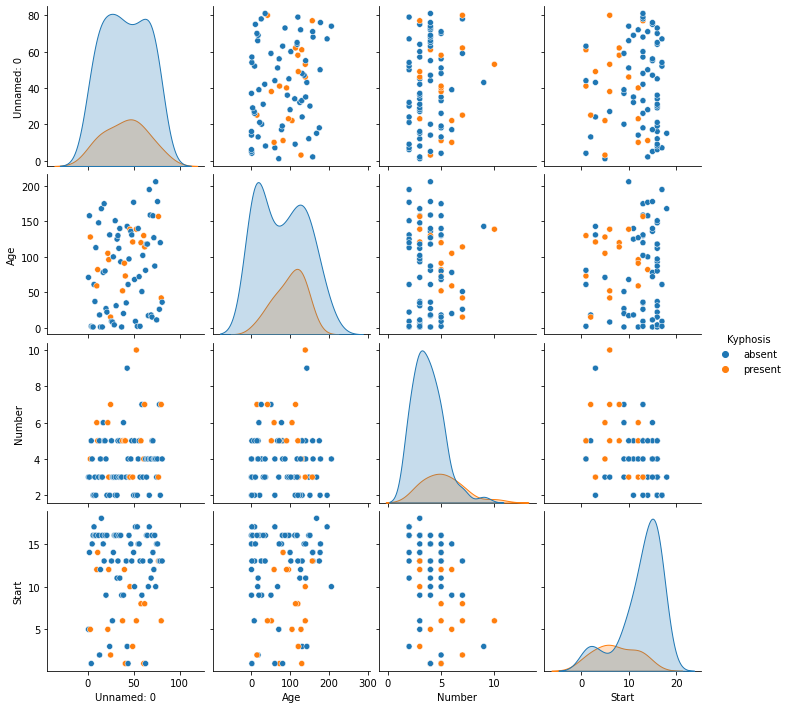

In [ ]:
data.info()
sns.pairplot(data,hue='Kyphosis')

In [ ]:
from sklearn.model_selection import train_test_split
x=data.drop('Kyphosis',axis=1)
y=data['Kyphosis']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=101)
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
prediction=dtree.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))

print(classification_report(y_test,prediction))

[[17  2]
 [ 4  4]]
              precision    recall  f1-score   support

      absent       0.81      0.89      0.85        19
     present       0.67      0.50      0.57         8

    accuracy                           0.78        27
   macro avg       0.74      0.70      0.71        27
weighted avg       0.77      0.78      0.77        27



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20000)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20000)

In [ ]:
rfc_pred=rfc.predict(x_test)
print(confusion_matrix(y_test,rfc_pred))

print(classification_report(y_test,rfc_pred))

[[19  0]
 [ 6  2]]
              precision    recall  f1-score   support

      absent       0.76      1.00      0.86        19
     present       1.00      0.25      0.40         8

    accuracy                           0.78        27
   macro avg       0.88      0.62      0.63        27
weighted avg       0.83      0.78      0.73        27



In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

features=list(data.columns[1:])
features

['Age', 'Number', 'Start', 'Kyphosis']

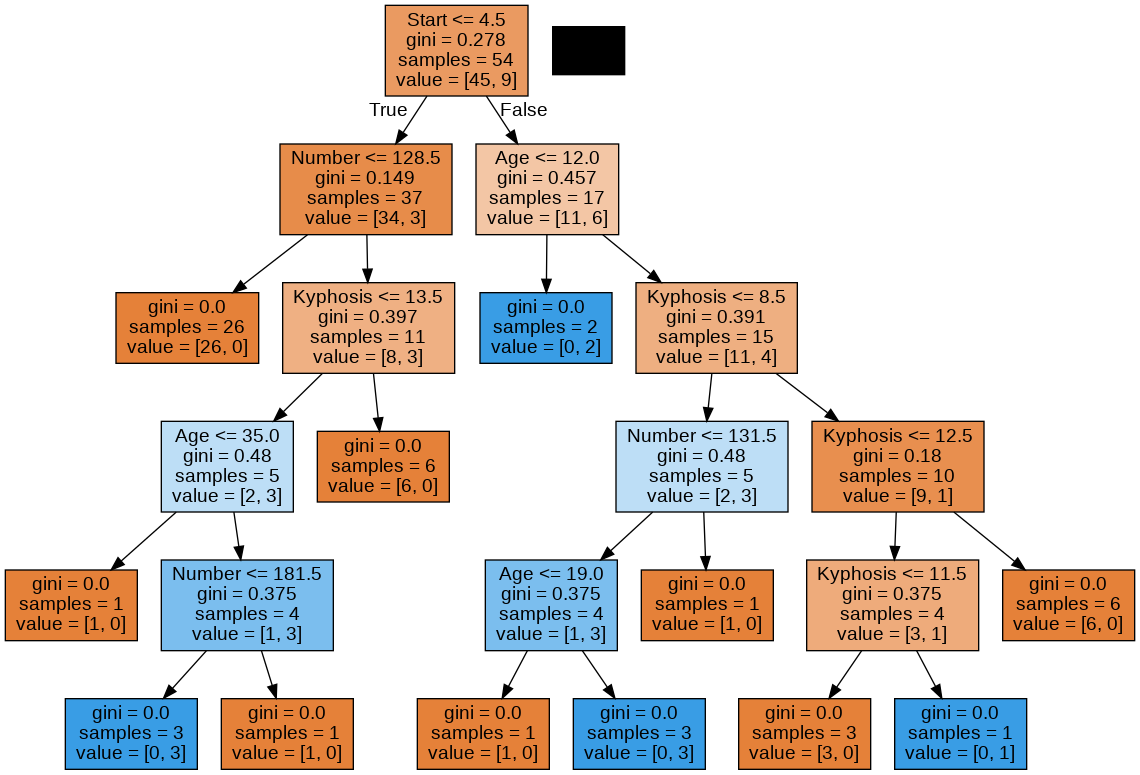

In [ ]:
import pydot
dot_data=StringIO()

export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph[0].create_png())